# Hotel Reservations Dataset

Data Dictionary

Booking_ID: unique identifier of each booking

noofadults: Number of adults

noofchildren: Number of Children

noofweekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

noofweek_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

typeofmeal_plan: Type of meal plan booked by the customer:

requiredcarparking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

roomtypereserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

marketsegmenttype: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

noofprevious_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

noofpreviousbookingsnot_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avgpriceper_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

noofspecial_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.

## Can you predict if the customer is going to honor the reservation or cancel it ?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#with zipfile.ZipFile(f'dataset/hotel_reservation.zip', 'r') as zip_ref:
#    zip_ref.extractall('dataset/')


# https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset/code

In [4]:
df = pd.read_csv('dataset/Hotel_Reservations.csv')

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
df.shape

(36275, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


## EDA

In [9]:
# Checking for duplicated rows
[x for x in df.duplicated() if x == True]

[]

In [10]:
# Checking for null values
df.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

Getting the number of cancelations to have it as an output for later model check. Saving it as df_test.

We also replacing the values of Not_Canceled and Canceled to 0 and 1 respectively.

In [11]:
df_teste = df.booking_status.replace({'Not_Canceled': 0, 'Canceled':1})
df_teste.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

<AxesSubplot: >

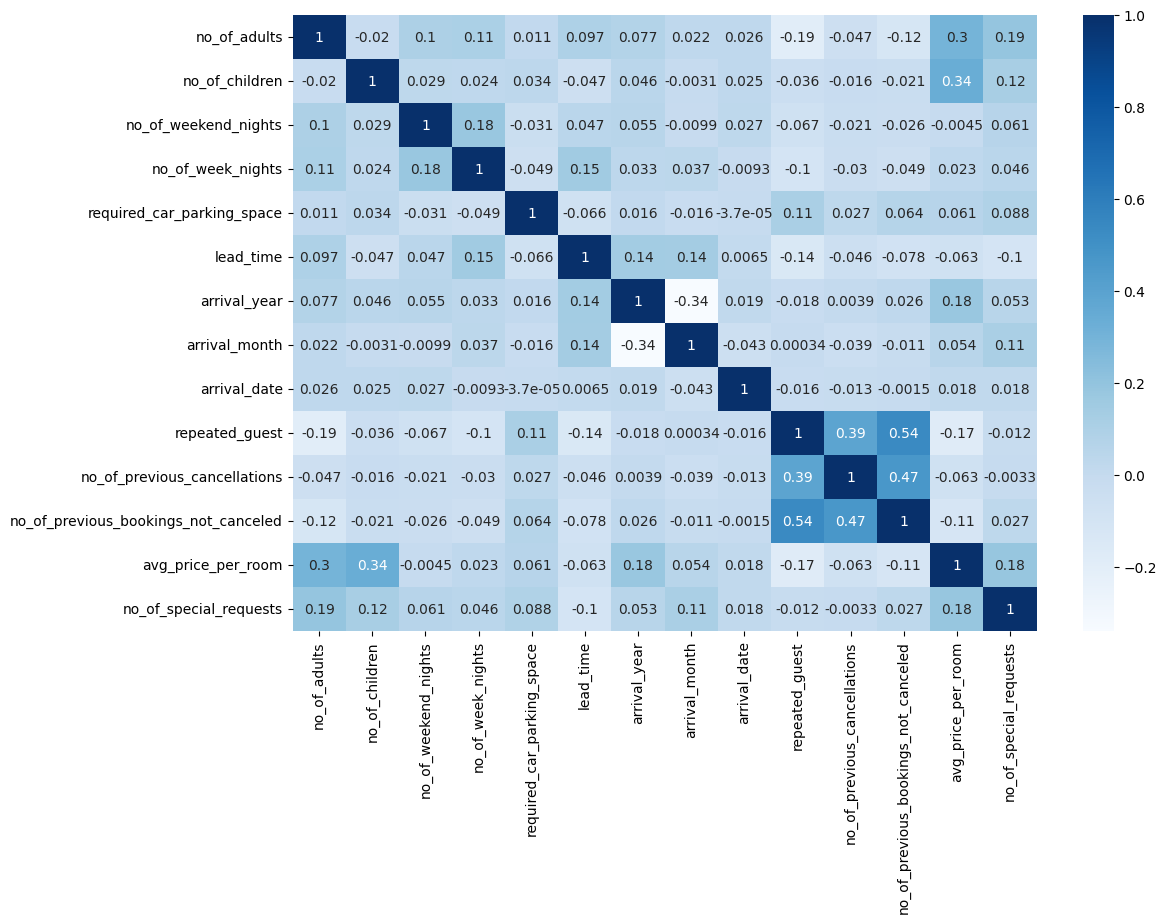

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')

Separating the data for training, by excluding booking_status column and saving in the df_train dataset

In [13]:
df_train = df.drop('booking_status', axis=1)
df_train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0


Now we need to make a serie of changes in the df_train dataset, to make it ready to train the decision tree of cancelled or not cancelled bookings

### Checking the price of room per number of people

Viewing the mean price of each room type

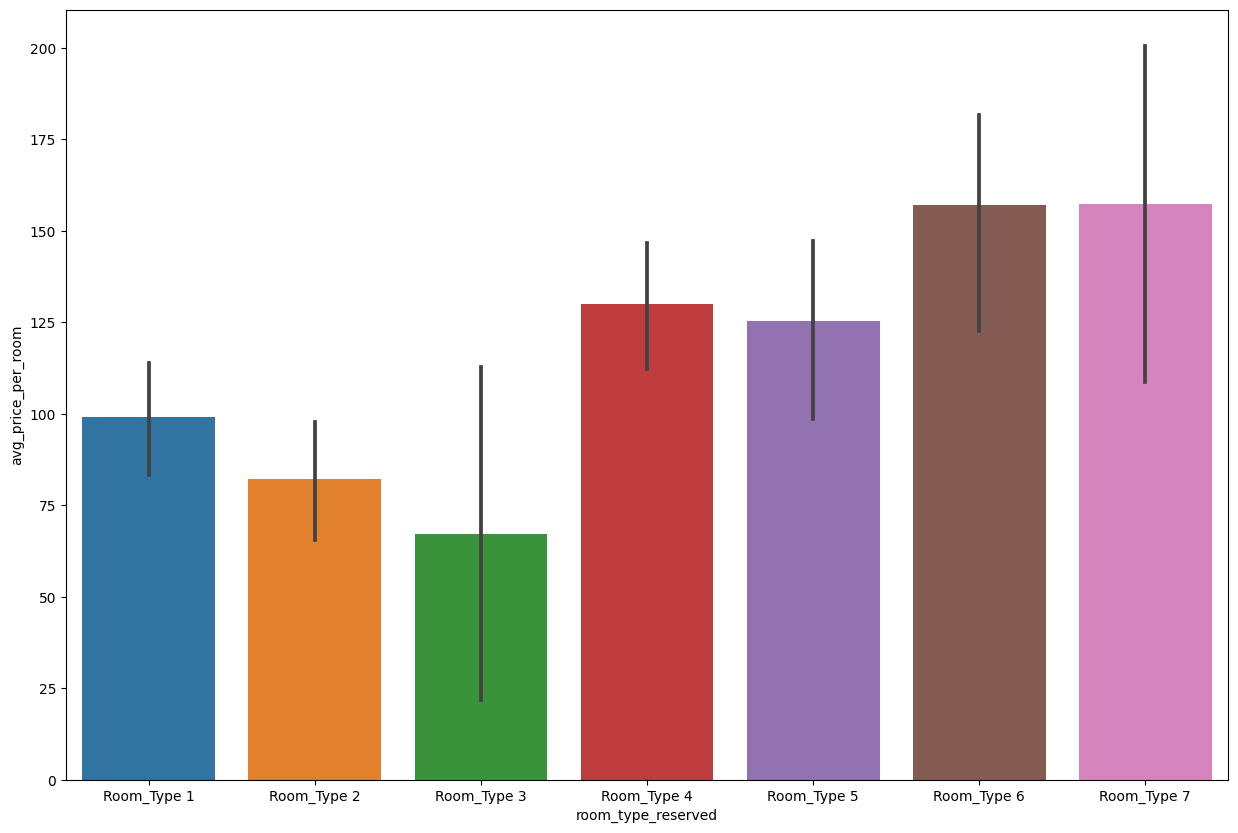

In [14]:
price_people_room = df_train.groupby(['room_type_reserved', 'no_of_adults', 'no_of_children'])['avg_price_per_room'].agg('mean').reset_index()
price_people_room

plt.figure(figsize=(15,10))
sns.barplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room')
plt.show()

### Join number of adults and children

Decided to join because there is no clear specification of cost difference between those groups

In [15]:
df_train['no_of_people'] = df_train.no_of_adults + df_train.no_of_children
df_train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,3
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,2
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,2


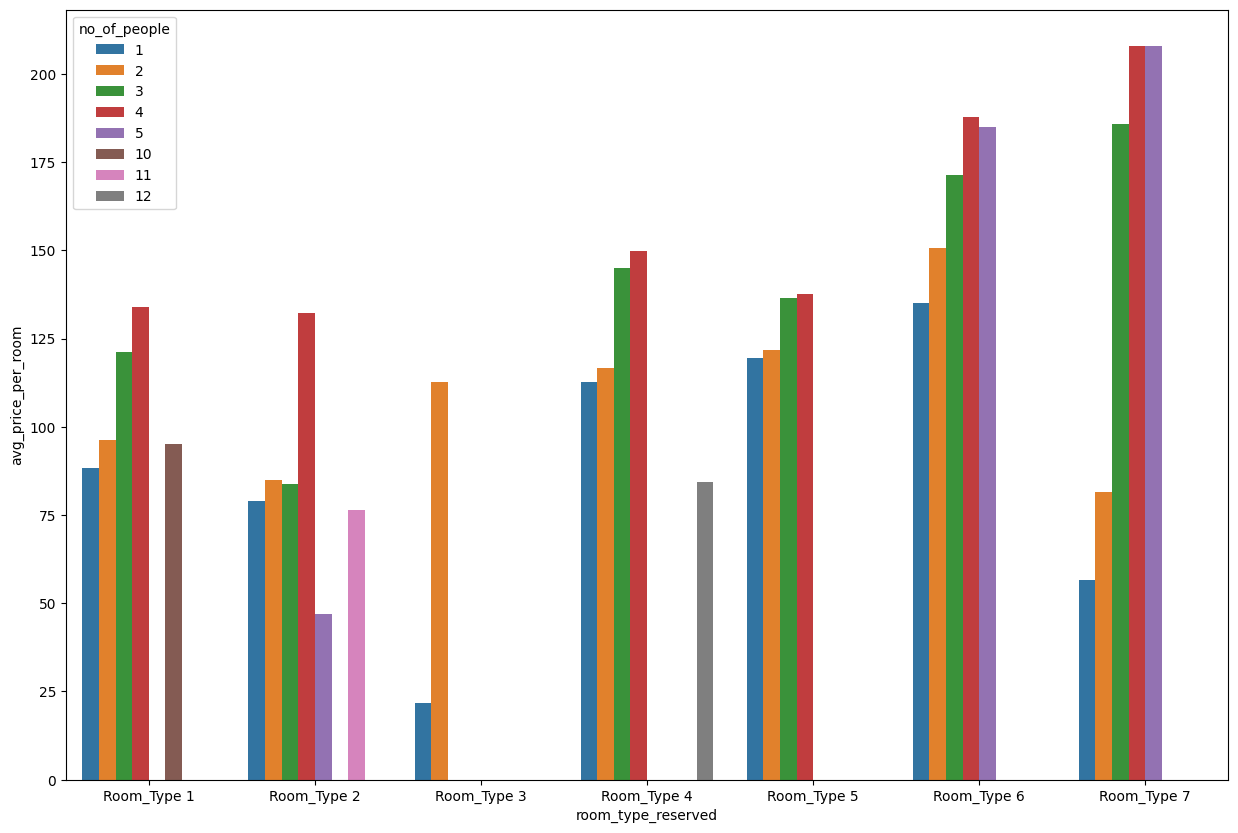

In [16]:
price_people_room = df_train.groupby(['room_type_reserved', 'no_of_people'])['avg_price_per_room'].agg('mean').reset_index()
price_people_room

plt.figure(figsize=(15,10))
sns.barplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room', hue='no_of_people')
plt.show()

Is interesting to note that Room_Type 3 can only acommodate 2 people at max.
Room_Type 3 also is the cheapest room in average.

Other strange info is that Room_Type 4 can either acommodate to 4 people or 12, no between data.

### Looking for outliers in the average price per room type

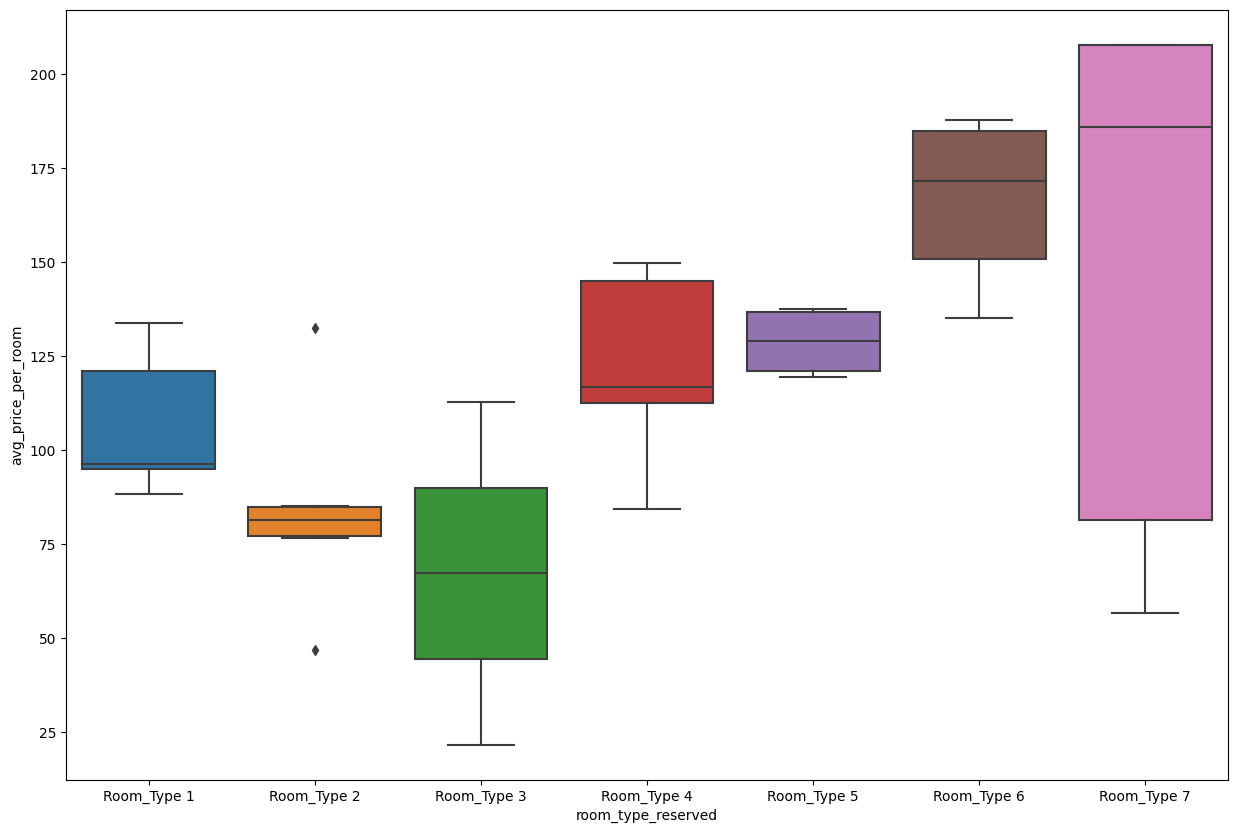

In [17]:
price_people_room = df_train.groupby(['room_type_reserved', 'no_of_people'])['avg_price_per_room'].agg('mean').reset_index()
price_people_room

plt.figure(figsize=(15,10))
sns.boxplot(data=price_people_room, x='room_type_reserved', y='avg_price_per_room')
plt.show()

We can conclude the following: 

    1. Room Type 3 is the cheapest room by average
    2. Room Type 6 and 7 are the expensive rooms by average
    3. Room Type 1 and 2 are average price close to each other, with 2 having a big difference in outliers
    4. Room Type 4 and 5 are the most consistent in terms of average price.
    
With this in mind, we can reclassify the Room Type Columns by they average price in order to use those values in the ML model classification

Listing the room types and replacing the string values by the mean of the boxplot graphs above.

In [18]:
room_average_values = price_people_room.groupby(["room_type_reserved"]).avg_price_per_room.median().reset_index()
room_average_values

,room_type_reserved,avg_price_per_room
0,Room_Type 1,96.357592
1,Room_Type 2,81.444630
2,Room_Type 3,67.177083
3,Room_Type 4,116.658172
4,Room_Type 5,129.103291
5,Room_Type 6,171.447692
6,Room_Type 7,185.853793


In [19]:
room_type = room_average_values.room_type_reserved.values.tolist()
room_type

['Room_Type 1',
 'Room_Type 2',
 'Room_Type 3',
 'Room_Type 4',
 'Room_Type 5',
 'Room_Type 6',
 'Room_Type 7']

In [20]:
room_average_values = room_average_values.avg_price_per_room.values.tolist()
room_average_values

[96.35759189106173,
 81.44462962962963,
 67.17708333333333,
 116.6581718924972,
 129.10329059829058,
 171.4476923076923,
 185.85379310344828]

### Looking at the Type of Meal Plan column

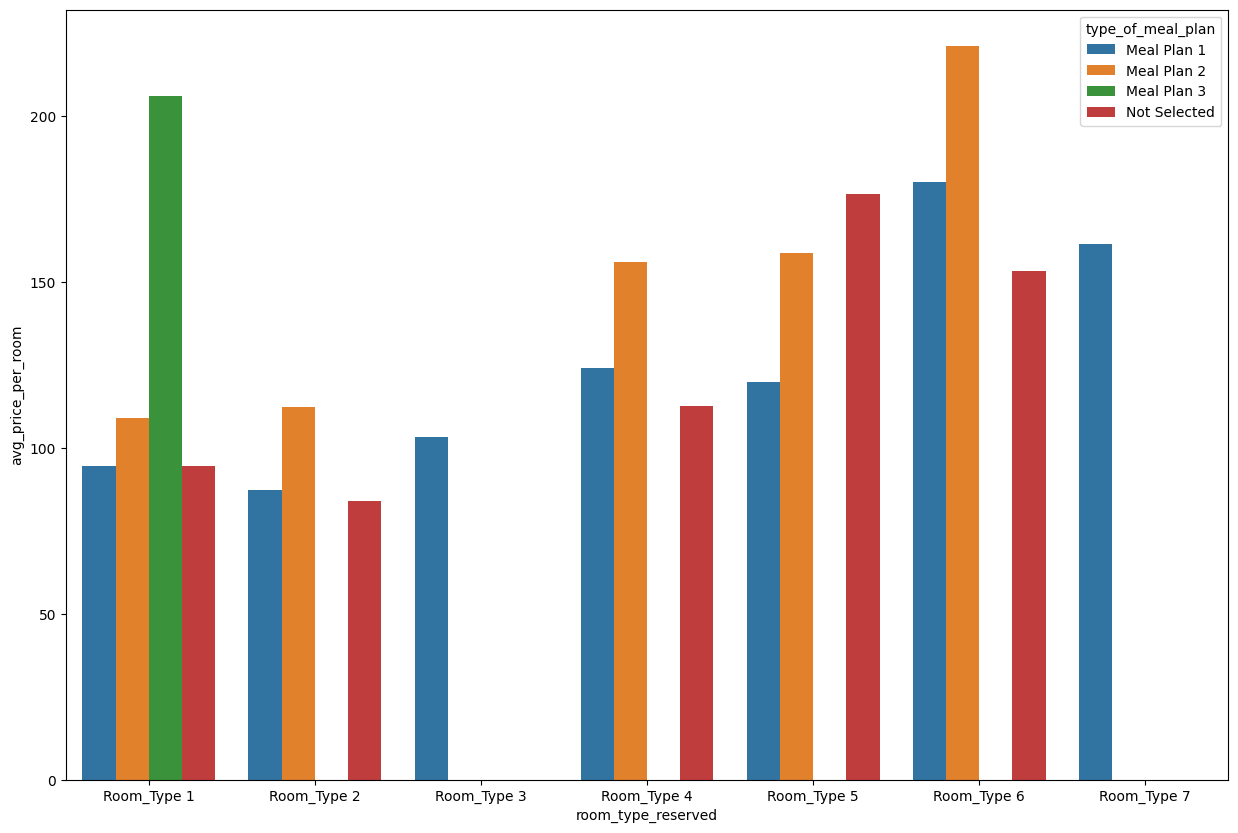

In [21]:
price_meal_room = df_train.groupby(['room_type_reserved', 'type_of_meal_plan'])['avg_price_per_room'].agg('mean').reset_index()
price_meal_room

plt.figure(figsize=(15,10))
sns.barplot(data=price_meal_room, x='room_type_reserved', y='avg_price_per_room', hue='type_of_meal_plan')
plt.show()

We can conclude the following: 

    1. Room Type 3 has only the Meal Plan 1 which makes sense because it's the cheapest room.
    2. Room 7 also has only the Meal Plan 1 besides being the most expensive by mean.
    3. Room Type 1 offers all meals, with the Meal Plan 3 being very expensive
    4. All rooms that have a Not Selected meal plan will be transformed to 0 since they are false aggregated value
    
With this in mind, I can reclassify the Type of meal plan by they average price in order to use those values in the ML model classification, making sure that Not Selected == 0

To make a more equal evaluation of each meal type, I chhose to make a standart deviation of the average room value price

In [22]:
meal_average_values = price_meal_room.groupby(["type_of_meal_plan"]).avg_price_per_room.std()
meal_average_values

type_of_meal_plan
Meal Plan 1      34.648553
Meal Plan 2      73.955151
Meal Plan 3     118.934155
Not Selected     68.554202
Name: avg_price_per_room, dtype: float64

In [23]:
meal_average_values = list(meal_average_values)
meal_average_values

[34.64855288169628, 73.95515129470458, 118.9341554530629, 68.5542024010088]

In [24]:
meal_average_values[3] = 0.0
meal_average_values

[34.64855288169628, 73.95515129470458, 118.9341554530629, 0.0]

In [25]:
meal_types = sorted(list(df_train.type_of_meal_plan.drop_duplicates()))
meal_types

['Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3', 'Not Selected']

### Dropping the Booking_ID column

In [26]:
df_train

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,2
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,2
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,2
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,3
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,2
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,2
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,2


In [27]:
df_train = df_train.drop('Booking_ID', axis = 1)
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,2
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,2
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,2
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,3
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,2
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,2
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,2


### Replace values

In [28]:
# Replacing room type str
mapping = {room_type[i]: room_average_values[i] for i in range(len(room_type))}
df_train.room_type_reserved = df_train.room_type_reserved.map(mapping)
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,Meal Plan 1,0,96.357592,224,2017,10,2,Offline,0,0,0,65.00,0,2
1,2,0,2,3,Not Selected,0,96.357592,5,2018,11,6,Online,0,0,0,106.68,1,2
2,1,0,2,1,Meal Plan 1,0,96.357592,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,96.357592,211,2018,5,20,Online,0,0,0,100.00,0,2
4,2,0,1,1,Not Selected,0,96.357592,48,2018,4,11,Online,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,116.658172,85,2018,8,3,Online,0,0,0,167.80,1,3
36271,2,0,1,3,Meal Plan 1,0,96.357592,228,2018,10,17,Online,0,0,0,90.95,2,2
36272,2,0,2,6,Meal Plan 1,0,96.357592,148,2018,7,1,Online,0,0,0,98.39,2,2
36273,2,0,0,3,Not Selected,0,96.357592,63,2018,4,21,Online,0,0,0,94.50,0,2


In [29]:
# Replacing market segmentation str
market_seg = list(df_train.market_segment_type.drop_duplicates())
df_train.market_segment_type = df_train.market_segment_type.replace(market_seg, [1,2,3,4,5])
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,Meal Plan 1,0,96.357592,224,2017,10,2,1,0,0,0,65.00,0,2
1,2,0,2,3,Not Selected,0,96.357592,5,2018,11,6,2,0,0,0,106.68,1,2
2,1,0,2,1,Meal Plan 1,0,96.357592,1,2018,2,28,2,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,96.357592,211,2018,5,20,2,0,0,0,100.00,0,2
4,2,0,1,1,Not Selected,0,96.357592,48,2018,4,11,2,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,116.658172,85,2018,8,3,2,0,0,0,167.80,1,3
36271,2,0,1,3,Meal Plan 1,0,96.357592,228,2018,10,17,2,0,0,0,90.95,2,2
36272,2,0,2,6,Meal Plan 1,0,96.357592,148,2018,7,1,2,0,0,0,98.39,2,2
36273,2,0,0,3,Not Selected,0,96.357592,63,2018,4,21,2,0,0,0,94.50,0,2


In [30]:
# Replacing type meal str
mapping = {meal_types[i]: meal_average_values[i] for i in range(len(meal_types))}
df_train.type_of_meal_plan = df_train.type_of_meal_plan.map(mapping)
df_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,no_of_people
0,2,0,1,2,34.648553,0,96.357592,224,2017,10,2,1,0,0,0,65.00,0,2
1,2,0,2,3,0.000000,0,96.357592,5,2018,11,6,2,0,0,0,106.68,1,2
2,1,0,2,1,34.648553,0,96.357592,1,2018,2,28,2,0,0,0,60.00,0,1
3,2,0,0,2,34.648553,0,96.357592,211,2018,5,20,2,0,0,0,100.00,0,2
4,2,0,1,1,0.000000,0,96.357592,48,2018,4,11,2,0,0,0,94.50,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,34.648553,0,116.658172,85,2018,8,3,2,0,0,0,167.80,1,3
36271,2,0,1,3,34.648553,0,96.357592,228,2018,10,17,2,0,0,0,90.95,2,2
36272,2,0,2,6,34.648553,0,96.357592,148,2018,7,1,2,0,0,0,98.39,2,2
36273,2,0,0,3,0.000000,0,96.357592,63,2018,4,21,2,0,0,0,94.50,0,2


In [31]:
df_teste

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

# ML Models

In [32]:
X = df_train.values
Y = df_teste.values

In [33]:
X

array([[  2.  ,   0.  ,   1.  , ...,  65.  ,   0.  ,   2.  ],
       [  2.  ,   0.  ,   2.  , ..., 106.68,   1.  ,   2.  ],
       [  1.  ,   0.  ,   2.  , ...,  60.  ,   0.  ,   1.  ],
       ...,
       [  2.  ,   0.  ,   2.  , ...,  98.39,   2.  ,   2.  ],
       [  2.  ,   0.  ,   0.  , ...,  94.5 ,   0.  ,   2.  ],
       [  2.  ,   0.  ,   1.  , ..., 161.67,   0.  ,   2.  ]])

In [34]:
#Definindo a razão do dataset de treino e teste
# 30 teste 70 treino
split_test_size = 0.30

In [35]:
#Criando dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=split_test_size, random_state=42)

In [36]:
X_treino.__len__()

25392

In [37]:
X_teste.__len__()

10883

In [38]:
Y_treino.__len__()

25392

In [39]:
Y_teste.__len__()

10883

In [40]:
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

70.00% nos dados de treino
30.00% nos dados de teste


In [41]:
X_treino

array([[  2.  ,   0.  ,   1.  , ...,  90.95,   0.  ,   2.  ],
       [  2.  ,   0.  ,   1.  , ...,  90.95,   1.  ,   2.  ],
       [  2.  ,   0.  ,   1.  , ...,  99.45,   1.  ,   2.  ],
       ...,
       [  2.  ,   0.  ,   0.  , ..., 110.  ,   1.  ,   2.  ],
       [  2.  ,   0.  ,   0.  , ..., 130.  ,   0.  ,   2.  ],
       [  2.  ,   0.  ,   0.  , ..., 167.2 ,   0.  ,   2.  ]])

### GaussianNB model

In [42]:
modelo_v1 = GaussianNB()
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

In [43]:
score = modelo_v1.score(X_treino, Y_treino.ravel())
score

0.4443919344675488

In [44]:
nb_predict_train = modelo_v1.predict(X_treino)
print("Exatidão (Acurácia) no treino: {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
nb_predict_test = modelo_v1.predict(X_teste)
print("Exatidão (Acurácia) no teste: {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Acurácia) no treino: 0.4444
Exatidão (Acurácia) no teste: 0.4459


In [45]:
print('Classificação do Modelo')
print(metrics.classification_report(Y_teste, nb_predict_test, labels=[1, 0]))

Classificação do Modelo
              precision    recall  f1-score   support

           1       0.37      0.98      0.54      3607
           0       0.94      0.18      0.31      7276

    accuracy                           0.45     10883
   macro avg       0.65      0.58      0.42     10883
weighted avg       0.75      0.45      0.38     10883



In [46]:
y_pred2 = modelo_v1.predict(X_teste)
rscore = r2_score(Y_teste, y_pred2)
rscore

-1.500501437785212

### RandomForest model

In [47]:
modelo_v2 = RandomForestClassifier(n_estimators=200, max_depth=20, criterion='gini')
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(max_depth=20, n_estimators=200)

In [48]:
score = modelo_v2.score(X_treino, Y_treino.ravel())
score

0.966052299936988

In [49]:
nb_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Acurácia) no treino: {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
nb_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Acurácia) no teste: {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Acurácia) no treino: 0.9661
Exatidão (Acurácia) no teste: 0.9032


In [50]:
print('Classificação do Modelo')
print(metrics.classification_report(Y_teste, nb_predict_test, labels=[1, 0]))

Classificação do Modelo
              precision    recall  f1-score   support

           1       0.89      0.81      0.85      3607
           0       0.91      0.95      0.93      7276

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



In [51]:
nb_predict_train = modelo_v2.predict(X_treino)
print("Exatidão (Acurácia) no treino: {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
nb_predict_test = modelo_v2.predict(X_teste)
print("Exatidão (Acurácia) no teste: {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Acurácia) no treino: 0.9661
Exatidão (Acurácia) no teste: 0.9032


In [52]:
print('Classificação do Modelo')
print(metrics.classification_report(Y_teste, nb_predict_test, labels=[1, 0]))

Classificação do Modelo
              precision    recall  f1-score   support

           1       0.89      0.81      0.85      3607
           0       0.91      0.95      0.93      7276

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



In [53]:
y_pred2 = modelo_v2.predict(X_teste)
rscore = r2_score(Y_teste, y_pred2)
rscore

0.5633452713121346

### LogisticRegression model

#### For applying a LogisticRegression, we need to Standard the X_treino data

In [54]:
X_treino

array([[  2.  ,   0.  ,   1.  , ...,  90.95,   0.  ,   2.  ],
       [  2.  ,   0.  ,   1.  , ...,  90.95,   1.  ,   2.  ],
       [  2.  ,   0.  ,   1.  , ...,  99.45,   1.  ,   2.  ],
       ...,
       [  2.  ,   0.  ,   0.  , ..., 110.  ,   1.  ,   2.  ],
       [  2.  ,   0.  ,   0.  , ..., 130.  ,   0.  ,   2.  ],
       [  2.  ,   0.  ,   0.  , ..., 167.2 ,   0.  ,   2.  ]])

In [55]:
scaler = preprocessing.StandardScaler().fit(X_treino)
scaler

StandardScaler()

In [56]:
scaler.mean_

array([1.84506931e+00, 1.05151229e-01, 8.10137051e-01, 2.20132325e+00,
       3.34166117e+01, 3.13484562e-02, 1.02055511e+02, 8.54115076e+01,
       2.01781947e+03, 7.42395243e+00, 1.56251181e+01, 1.80367832e+00,
       2.51654064e-02, 2.39051670e-02, 1.56190926e-01, 1.03485770e+02,
       6.18304978e-01, 1.95022054e+00])

In [57]:
scaler.scale_

array([ 0.5190337 ,  0.4018921 ,  0.86774426,  1.39657115, 17.59589869,
        0.17425766, 15.22691572, 85.74424885,  0.38462771,  3.05954064,
        8.73013205,  0.64715266,  0.15662729,  0.37864431,  1.81889702,
       35.06636284,  0.78653934,  0.6484519 ])

In [58]:
X_scaled = scaler.transform(X_treino)
X_scaled

array([[ 0.29849832, -0.26164045,  0.21880058, ..., -0.35748702,
        -0.78610814,  0.07676662],
       [ 0.29849832, -0.26164045,  0.21880058, ..., -0.35748702,
         0.48528408,  0.07676662],
       [ 0.29849832, -0.26164045,  0.21880058, ..., -0.11508948,
         0.48528408,  0.07676662],
       ...,
       [ 0.29849832, -0.26164045, -0.93361269, ...,  0.18576864,
         0.48528408,  0.07676662],
       [ 0.29849832, -0.26164045, -0.93361269, ...,  0.75611579,
        -0.78610814,  0.07676662],
       [ 0.29849832, -0.26164045, -0.93361269, ...,  1.81696148,
        -0.78610814,  0.07676662]])

#### Scaled data has really close to 0 mean and unit variance equal to 1:

In [59]:
 X_scaled.mean(axis=0)

array([-6.07264711e-16,  1.15570841e-15,  3.21279095e-16,  1.65690577e-15,
        7.36608010e-13,  5.69586124e-16,  6.64438241e-13, -7.21435094e-19,
       -1.26180025e-13, -9.74024824e-17, -2.47222690e-17, -4.69063981e-16,
        4.71923487e-16,  3.19117304e-15, -1.46147556e-15,  2.87350309e-14,
       -3.53389515e-16, -3.63313620e-16])

In [60]:
X_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [61]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [62]:
x, y = make_classification(random_state=42)

In [63]:
modelo_v3 = make_pipeline(StandardScaler(), LogisticRegression())
modelo_v3.fit(X_treino, Y_treino.ravel())

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [64]:
nb_predict_train = modelo_v3.predict(X_treino)
print("Exatidão (Acurácia) no treino: {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
nb_predict_test = modelo_v3.predict(X_teste)
print("Exatidão (Acurácia) no teste: {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão (Acurácia) no treino: 0.7954
Exatidão (Acurácia) no teste: 0.7978


In [65]:
print('Classificação do Modelo')
print(metrics.classification_report(Y_teste, nb_predict_test, labels=[1, 0]))

Classificação do Modelo
              precision    recall  f1-score   support

           1       0.74      0.59      0.66      3607
           0       0.82      0.90      0.86      7276

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.79      0.80      0.79     10883



In [66]:
y_pred2 = modelo_v3.predict(X_teste)
rscore = r2_score(Y_teste, y_pred2)
rscore

0.08729624136562986

### RandomForestRegressor model

In [67]:
modelo_v4 = RandomForestRegressor()
modelo_v4.fit(X_treino, Y_treino.ravel())

RandomForestRegressor()

In [68]:
score = modelo_v4.score(X_treino, Y_treino.ravel())
score

0.9383135709146325

In [69]:
print('Classificação do Modelo')
print(metrics.classification_report(Y_teste, nb_predict_test, labels=[1, 0]))

Classificação do Modelo
              precision    recall  f1-score   support

           1       0.74      0.59      0.66      3607
           0       0.82      0.90      0.86      7276

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.79      0.80      0.79     10883



In [70]:
y_pred2 = modelo_v4.predict(X_teste)
rscore = r2_score(Y_teste, y_pred2)
rscore

0.6689688336406148

### Testing Models

In [71]:
Y_teste[2]

0

In [72]:
print(modelo_v1.predict(X_teste[2].reshape(1, -1)))
print(modelo_v2.predict(X_teste[2].reshape(1, -1)))
print(modelo_v3.predict(X_teste[2].reshape(1, -1)))
print(modelo_v4.predict(X_teste[2].reshape(1, -1)))

[1]
[0]
[0]
[0.]


In [73]:
Y_teste[18]

1

In [74]:
print(modelo_v1.predict(X_teste[18].reshape(1, -1)))
print(modelo_v2.predict(X_teste[18].reshape(1, -1)))
print(modelo_v3.predict(X_teste[18].reshape(1, -1)))
print(modelo_v4.predict(X_teste[18].reshape(1, -1)))

[1]
[1]
[0]
[0.72]


In [75]:
Y_teste[100]

0

In [76]:
print(modelo_v1.predict(X_teste[100].reshape(1, -1)))
print(modelo_v2.predict(X_teste[100].reshape(1, -1)))
print(modelo_v3.predict(X_teste[100].reshape(1, -1)))
print(modelo_v4.predict(X_teste[100].reshape(1, -1)))

[1]
[0]
[0]
[0.02]


In [77]:
#!pip install scikit-plot

In [78]:
import scikitplot as skplt

<AxesSubplot: title={'center': 'Digits Classification Learning Curve'}, xlabel='Training examples', ylabel='Score'>

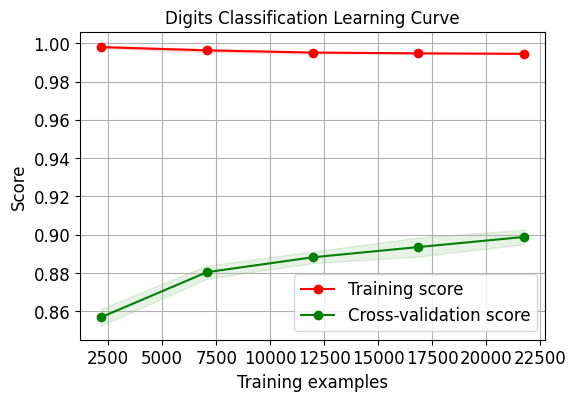

In [79]:
skplt.estimators.plot_learning_curve(RandomForestClassifier(), X_treino, Y_treino,
                                     cv=7, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Digits Classification Learning Curve")

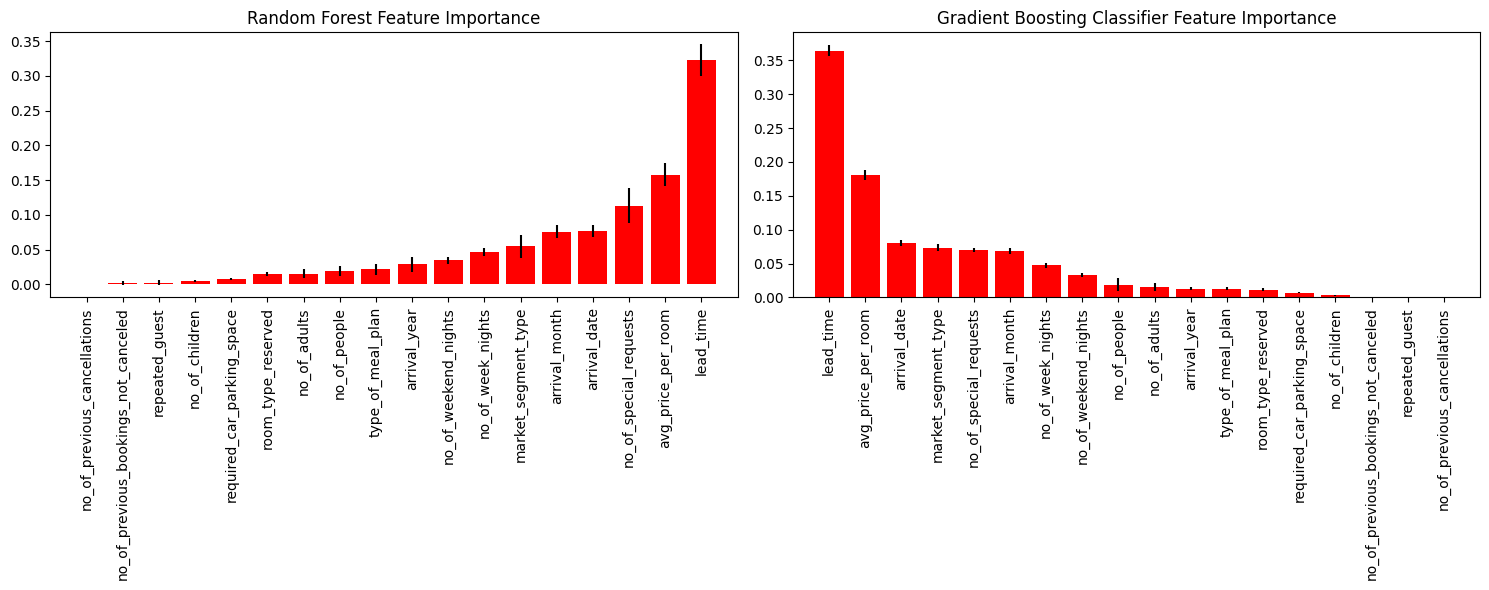

In [80]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(modelo_v2, feature_names=df_train.columns.to_list(),
                                         title="Random Forest Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);

ax2 = fig.add_subplot(122)
skplt.estimators.plot_feature_importances(modelo_v4, feature_names=df_train.columns.to_list(),
                                         title="Gradient Boosting Classifier Feature Importance",
                                         x_tick_rotation=90,
                                         ax=ax2);

plt.tight_layout()

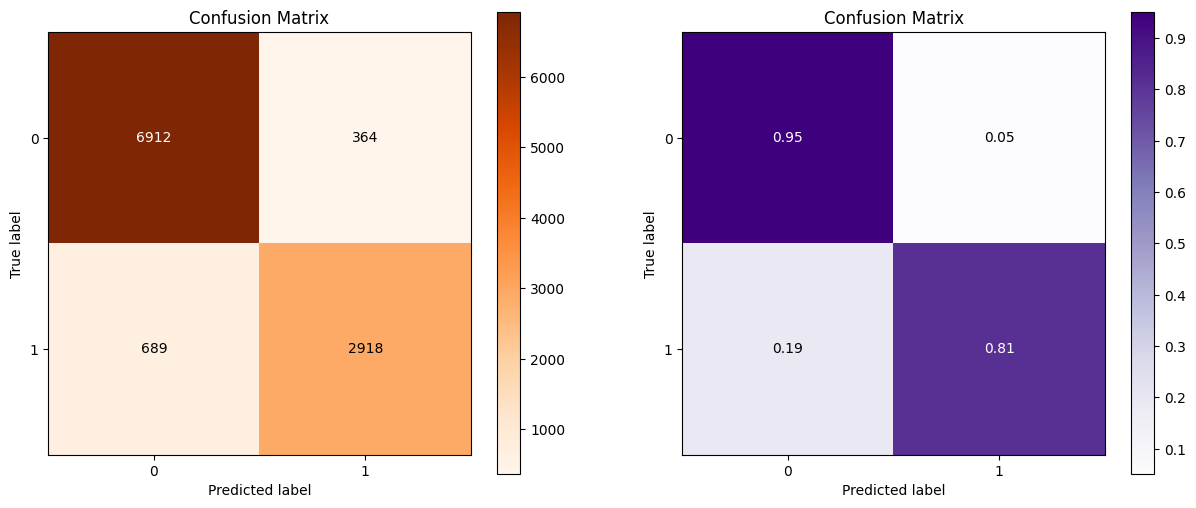

In [81]:
Y_predict = modelo_v2.predict(X_teste)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(Y_teste, Y_predict,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(Y_teste, Y_predict,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

#### Lesser the MSE => Smaller is the error => Better the estimator.

In [82]:
mse = (Y_teste - Y_predict)**2
print(f"MSE: {mse.mean():0.2f} (+/- {mse.std():0.2f})")

MSE: 0.10 (+/- 0.30)


#### Accuracy Score

In [83]:
from sklearn.metrics import accuracy_score

print(f'Accuracy Score is {accuracy_score(Y_teste, Y_predict)}')

Accuracy Score is 0.9032435909216209


### Estimating ROI (Return of Investiment)

#### Let's apply the modelo_v2 (Random Forest) as the final product classifier and see how much our model can have a payout

We can use the Confusion Matrix as a great evaluation parameter, since it gives absolute values of the True/False Positives/Negatives of the model

We can use this as a evaluation model to tell how much the Hotel will lose by costumers cancelling their reservetions

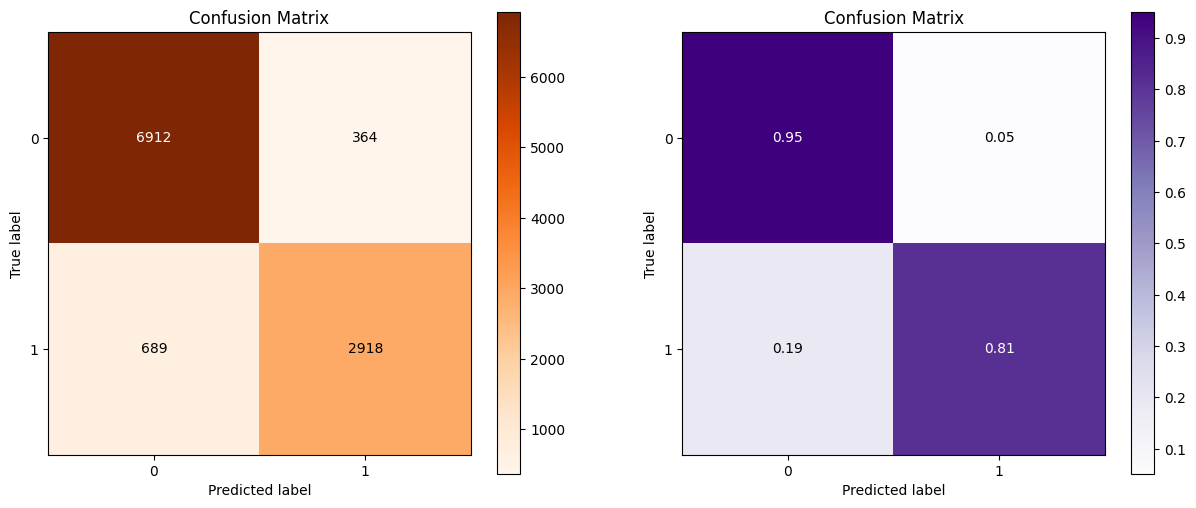

In [84]:
Y_predict = modelo_v2.predict(X_teste)

fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.metrics.plot_confusion_matrix(Y_teste, Y_predict,
                                    title="Confusion Matrix",
                                    cmap="Oranges",
                                    ax=ax1)

ax2 = fig.add_subplot(122)
skplt.metrics.plot_confusion_matrix(Y_teste, Y_predict,
                                    normalize=True,
                                    title="Confusion Matrix",
                                    cmap="Purples",
                                    ax=ax2);

We can interpret the Confusion Matrix as:

    1. True Positive(TP) signifies how many positive class samples your model predicted correctly (6915).
    2. True Negative(TN) signifies how many negative class samples your model predicted correctly (2920).
    3. False Positive(FP) signifies how many negative class samples your model predicted incorrectly (361).
    4. False Negative(FN) signifies how many positive class samples your model predicted incorrectly (687).



We can get the Mean Price per Room as a parameter to calculate how much the Hotel would earn/lose.

In [85]:
avg_price = round(df_train.avg_price_per_room.mean(), 2)
avg_price

103.42

Now we get a table that show us the impact of the **cancelled/not_cancelled** reservations in terms of money.

In [86]:
df_1 = pd.DataFrame(Y_predict, columns=['Predicted_Cancels'])
df_1['Price_Avg'] = round(df_train.avg_price_per_room.mean(), 2)

In [87]:
df_1.head()

,Predicted_Cancels,Price_Avg
0,0,103.42
1,0,103.42
2,0,103.42
3,1,103.42
4,0,103.42


In [88]:
df_1.Predicted_Cancels = df_1.Predicted_Cancels.replace({0: 'Not_Cancelled', 1: 'Cancelled'})

In [89]:
df_1 = df_1.groupby(['Predicted_Cancels'])['Price_Avg'].sum().reset_index()

In [90]:
df_1.head()

,Predicted_Cancels,Price_Avg
0,Cancelled,339424.44
1,Not_Cancelled,786095.42


Transform Cancelled values as negative

In [91]:
df_1.iloc[0, 1] = - df_1.iloc[0, 1]

In [92]:
df_1

,Predicted_Cancels,Price_Avg
0,Cancelled,-339424.44
1,Not_Cancelled,786095.42


In [93]:
print(f"Total expected Earnings: ${round((786198.84 - 339321.02), 2)}")

Total expected Earnings: $446877.82


So our model says that for our **test dataframe**, we would have a total income of:

$786198.84 - $339321.02 = $446877.82

**This is an example in how to use the trained models in real world decisions/scenarios**

### The most important aspects that the hotel should consider when determine if a client will be faithful to the reservation is:

1. The lead time
2. The average price per room
3. Number of Special Requests
4. The Arrival Date
5. The Arrival Month

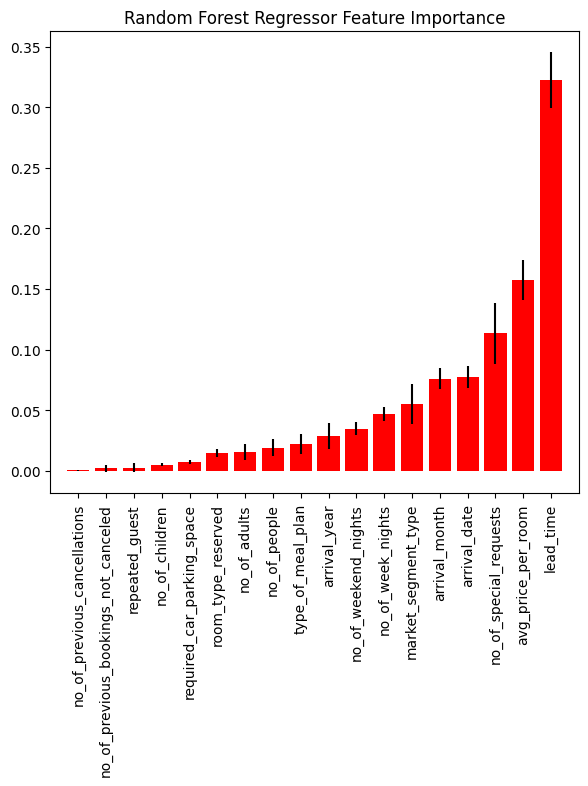

In [94]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
skplt.estimators.plot_feature_importances(modelo_v2, feature_names=df_train.columns.to_list(),
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90, order="ascending",
                                         ax=ax1);